In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as statss
from scipy import stats

In [278]:
dimonds=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/Dimonds_analysis/diamonds.csv")

In [279]:
dimonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [280]:
dimonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Data cleaning

In [281]:
dimonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [282]:
dimonds.duplicated().sum()

146

In [283]:
dimonds.drop_duplicates(inplace=True)

In [284]:
# new column 
dimonds["price_per_carat"]=dimonds["price"]/dimonds["carat"]


In [285]:

# 
dimonds["carat_label"]=dimonds["carat"].apply(lambda value: 
"XS" if value<0.5
else "S" if value<1 
else "M" if value<2
else "L" if value < 4
else "XL")

In [286]:
dimonds.loc[(dimonds["carat_label"]=="XS"),["carat","price","price_per_carat"]].head(5)

,carat,price,price_per_carat
0,0.23,326,1417.391304
1,0.21,326,1552.380952
2,0.23,327,1421.739130
3,0.29,334,1151.724138
4,0.31,335,1080.645161


In [287]:
dimonds.loc[(dimonds["carat_label"]=="M"),["carat","price","price_per_carat"]].tail(5)

,carat,price,price_per_carat
53793,1.01,2730,2702.970297
53863,1.00,2743,2743.000000
53875,1.04,2745,2639.423077
53879,1.04,2745,2639.423077
53897,1.02,2751,2697.058824


In [288]:
dimonds.describe()

,carat,depth,table,price,x,y,z,price_per_carat
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714,4009.762194
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037,2013.547539
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1051.162791
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,2478.431373
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3496.341463
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000,4950.000000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,17828.846154


In [303]:
# Identifying & removing  outlires 

def find_outlires_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outlires=df[(df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))]
    return outlires

find_outlires_IQR(dimonds["price_per_carat"]).sort_values(ascending=False)

27635    17828.846154
27530    17083.177570
27226    17077.669903
27457    16928.971963
26998    16764.705882
             ...     
25842     8658.139535
25241     8658.125000
27628     8657.943925
27191     8657.920792
24590     8657.718121
Name: price_per_carat, Length: 1820, dtype: float64

In [305]:
dimonds.sort_values(by="price_per_carat",ascending=False).head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat,carat_label
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.846154,M
27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.177570,M
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03,17077.669903,M
27457,1.07,Very Good,D,IF,60.9,58.0,18114,6.57,6.67,4.03,16928.971963,M
26998,1.02,Very Good,D,IF,61.7,59.0,17100,6.42,6.52,3.99,16764.705882,M


In [304]:
find_outlires_IQR(dimonds["price"]).sort_values(ascending=False)

27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
         ...  
23829    11903
23828    11901
23827    11899
23826    11899
23825    11897
Name: price, Length: 3523, dtype: int64

In [290]:
dimonds.describe()

,carat,depth,table,price,x,y,z,price_per_carat
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714,4009.762194
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037,2013.547539
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,1051.162791
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000,2478.431373
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,3496.341463
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000,4950.000000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,17828.846154


In [291]:
# Turning cut,color, clarity, carat_label into categories

dimonds["cut"]=pd.Categorical(dimonds["cut"],["Fair", "Good", "Very Good", "Premium", "Ideal"])
dimonds["color"]=pd.Categorical(dimonds["color"],['D', 'E', 'F', 'G', 'H', 'I', 'J'])
dimonds["clarity"]=pd.Categorical(dimonds["clarity"],["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
dimonds["carat_label"]=pd.Categorical(dimonds["carat_label"],["XS","S","M","L","XL"])


EDA

In [292]:
plt.style.use("dark_background")

<function matplotlib.pyplot.show(close=None, block=None)>

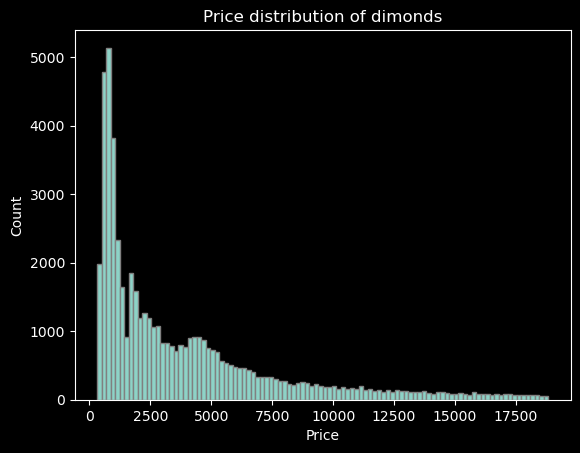

In [293]:
# Price distribution
x=dimonds["price"]
num_bins=100

plt.title("Price distribution of dimonds")
plt.xlabel("Price")
plt.ylabel("Count")
plt.style.use("dark_background")
plt.hist(x, num_bins,edgecolor="grey")
plt.show

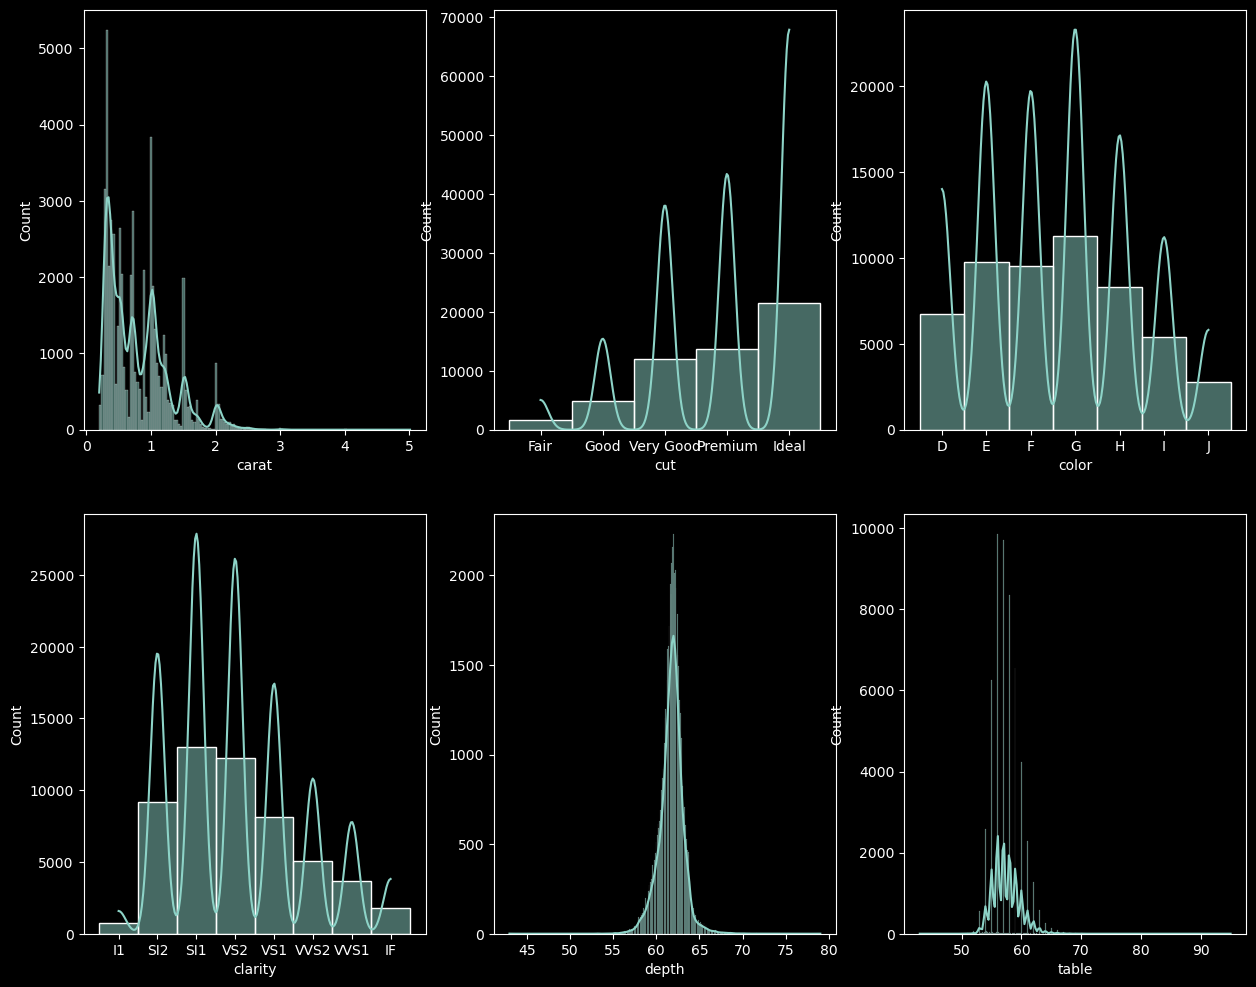

In [294]:
#Distribution of 

fig,axs=plt.subplots(2,3,figsize=(15,12))
ax.set_title("Distribution")
sns.histplot(data=dimonds,x="carat",kde=True,ax=axs[0,0])
sns.histplot(data=dimonds,x="cut",kde=True,ax=axs[0,1])
sns.histplot(data=dimonds,x="color",kde=True,ax=axs[0,2])
sns.histplot(data=dimonds,x="clarity",kde=True,ax=axs[1,0])
sns.histplot(data=dimonds,x="depth",kde=True,ax=axs[1,1])
sns.histplot(data=dimonds,x="table",kde=True,ax=axs[1,2])
plt.show()

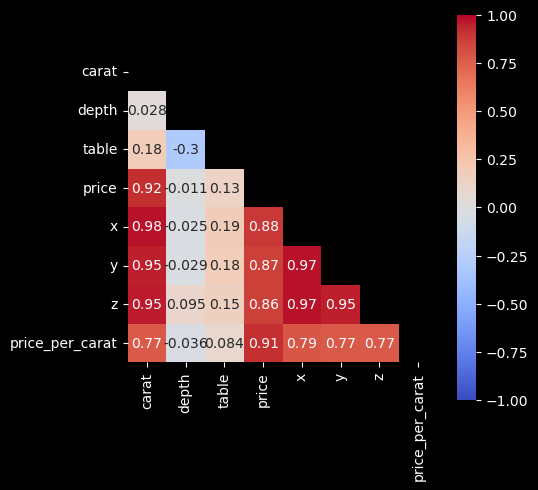

In [295]:
matrix=dimonds.corr()
fig,ax=plt.subplots(figsize=(5,5))
# Generate a mask to onlyshow the bottom triangle
mask=np.triu(np.ones_like(matrix,dtype=bool))

sns.heatmap(matrix,cmap="coolwarm",vmin=-1,vmax=1,robust=True,square=True,annot=True,mask=mask)



plt.show()

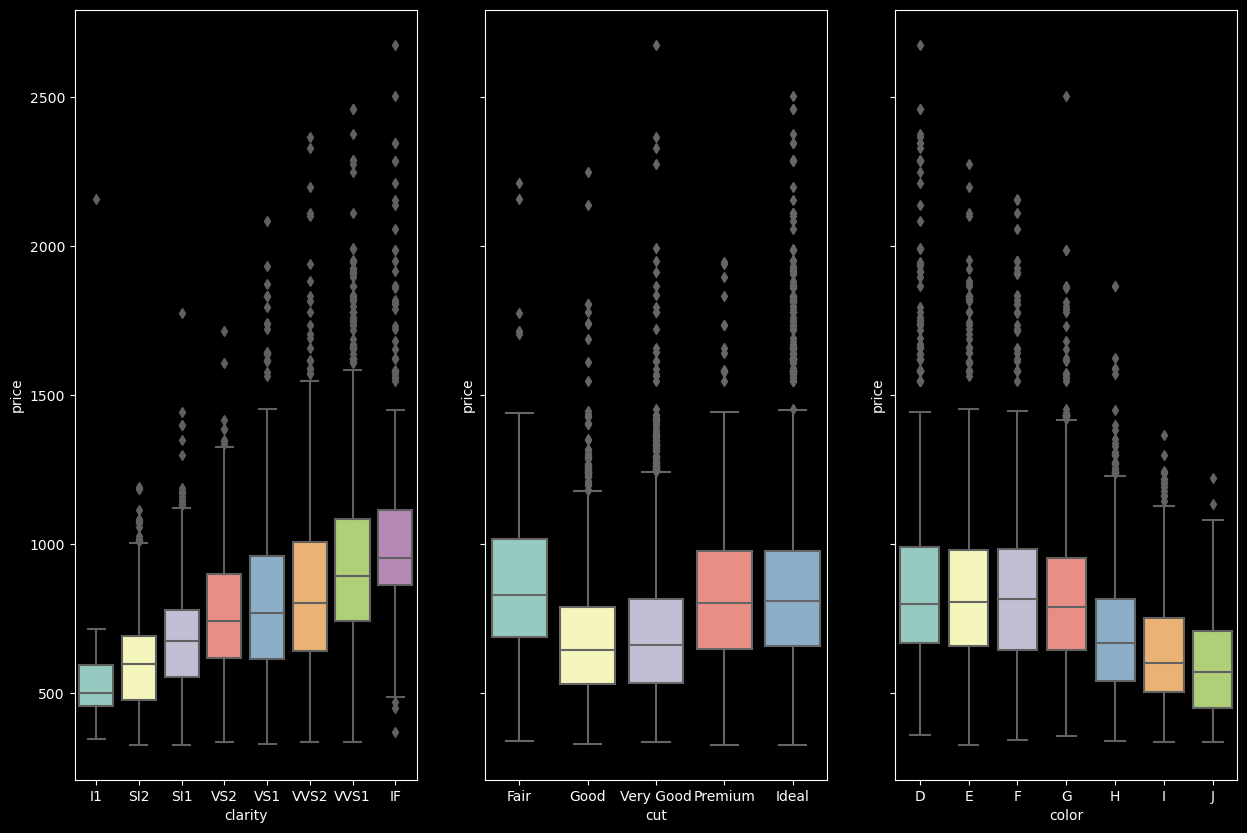

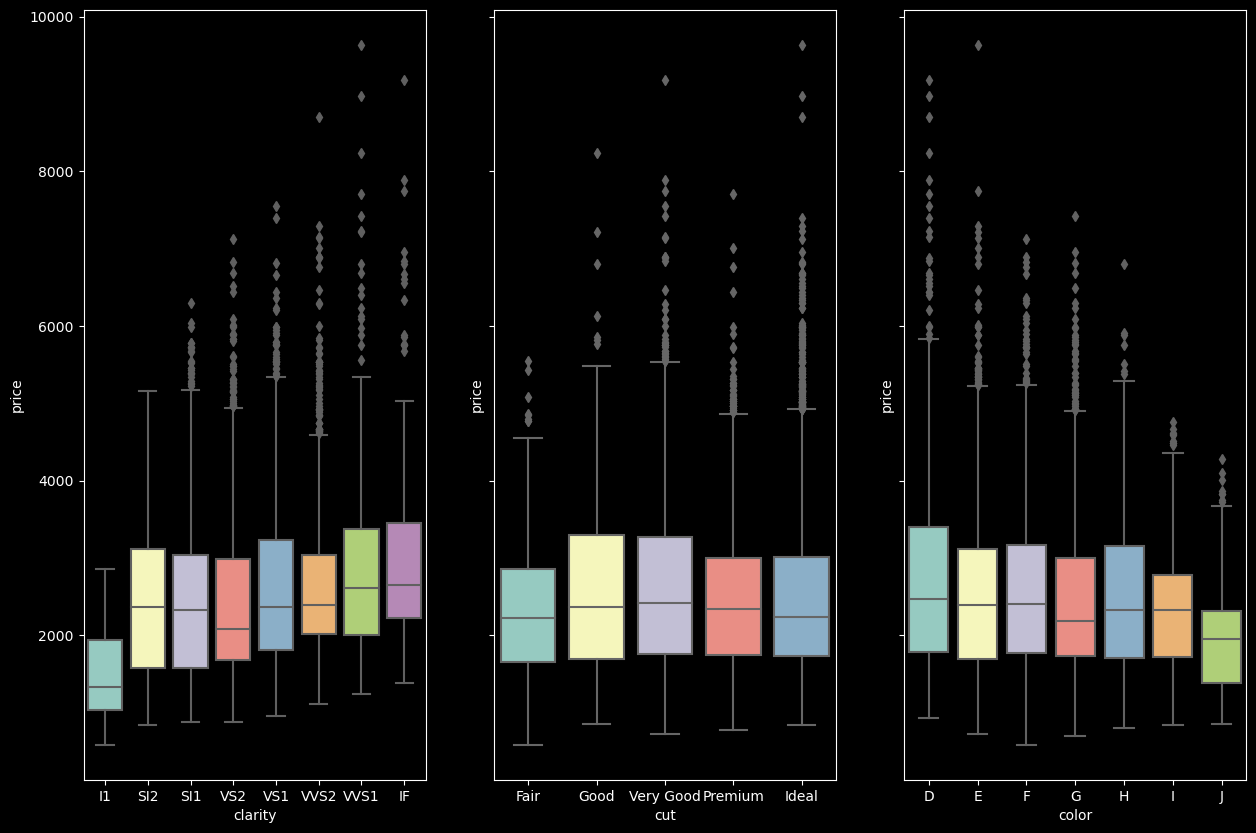

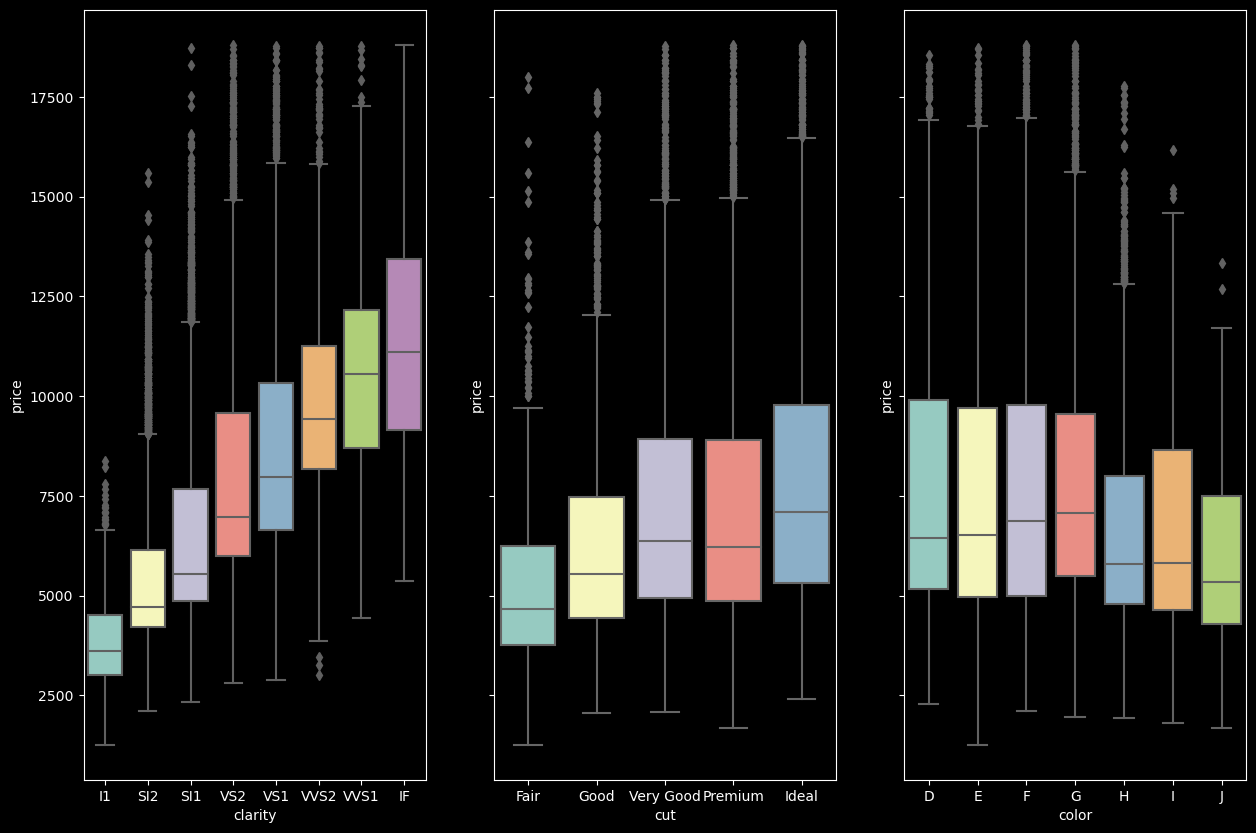

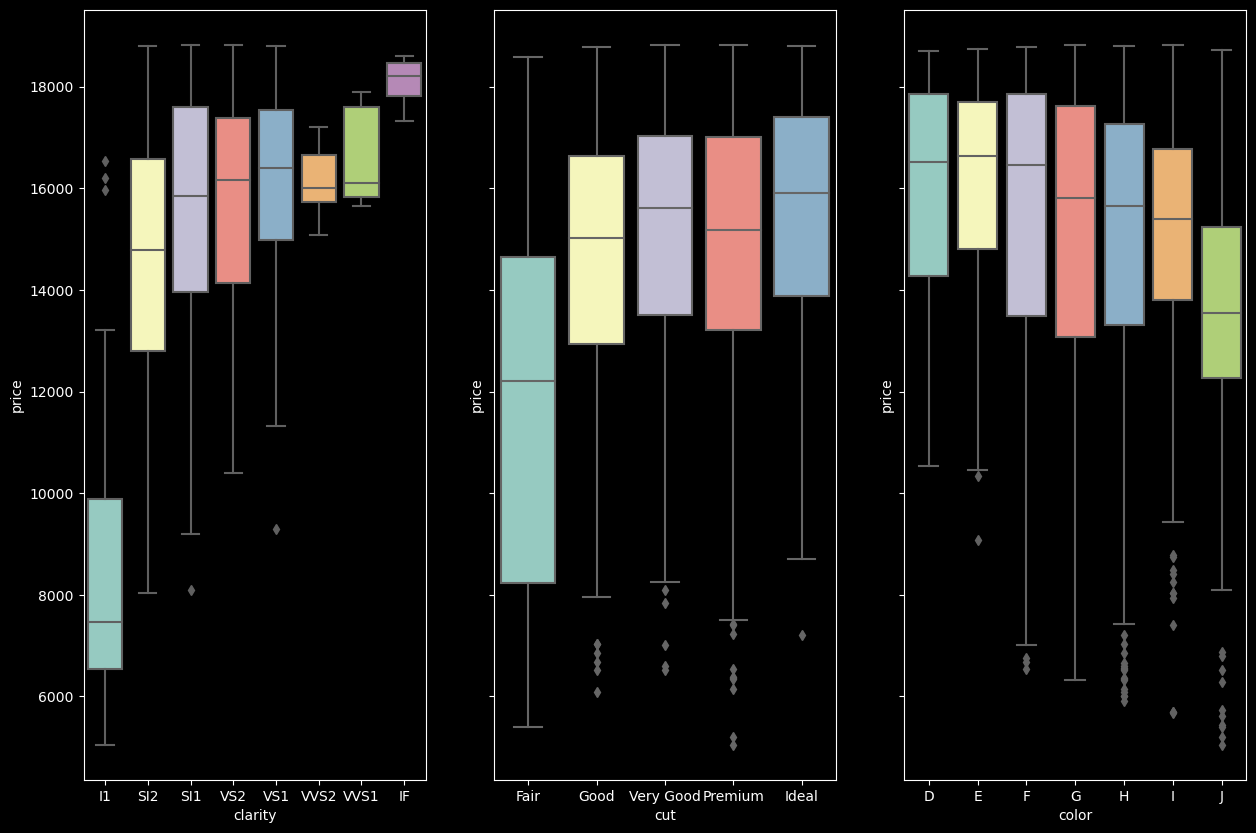

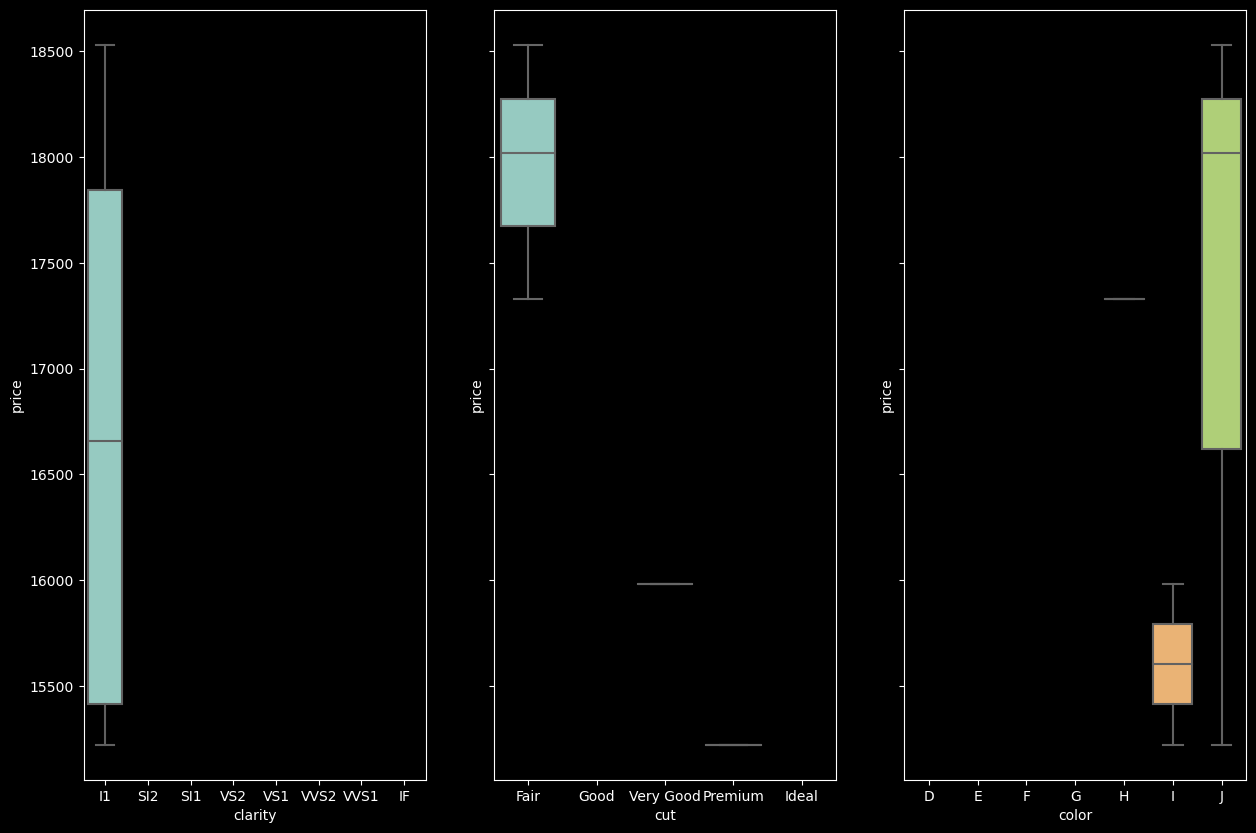

In [296]:
carat_label_list=["XS","S","M","L","XL"]

for carat_label in  carat_label_list:
    fig,axs=plt.subplots(1,3,sharey=True,figsize=(15,10))
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="clarity", ax=axs[0])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="cut",ax=axs[1])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price",x="color",ax=axs[2])
    ax.set_title(carat_label)


    plt.show()

In [297]:
#print("median   - ",stats.median(dimonds[(dimonds["carat_label"])=="XS"]

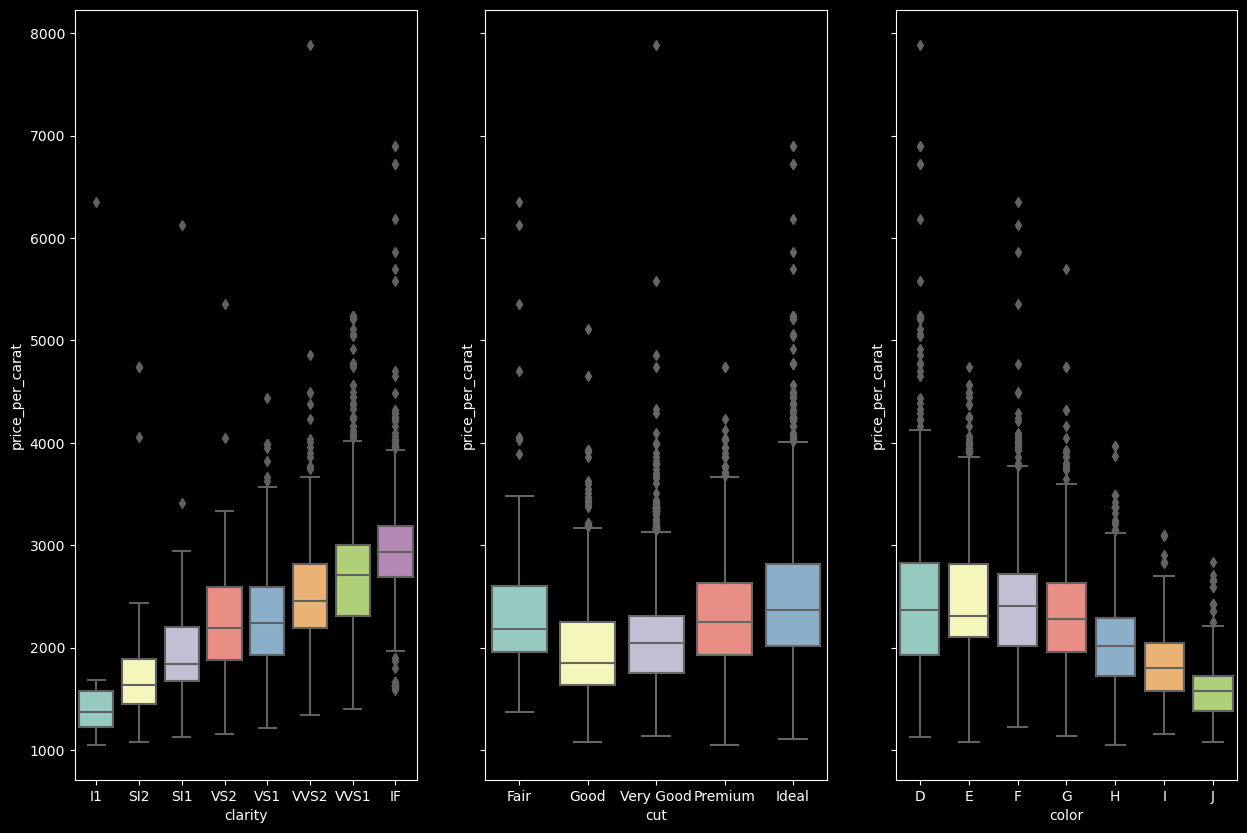

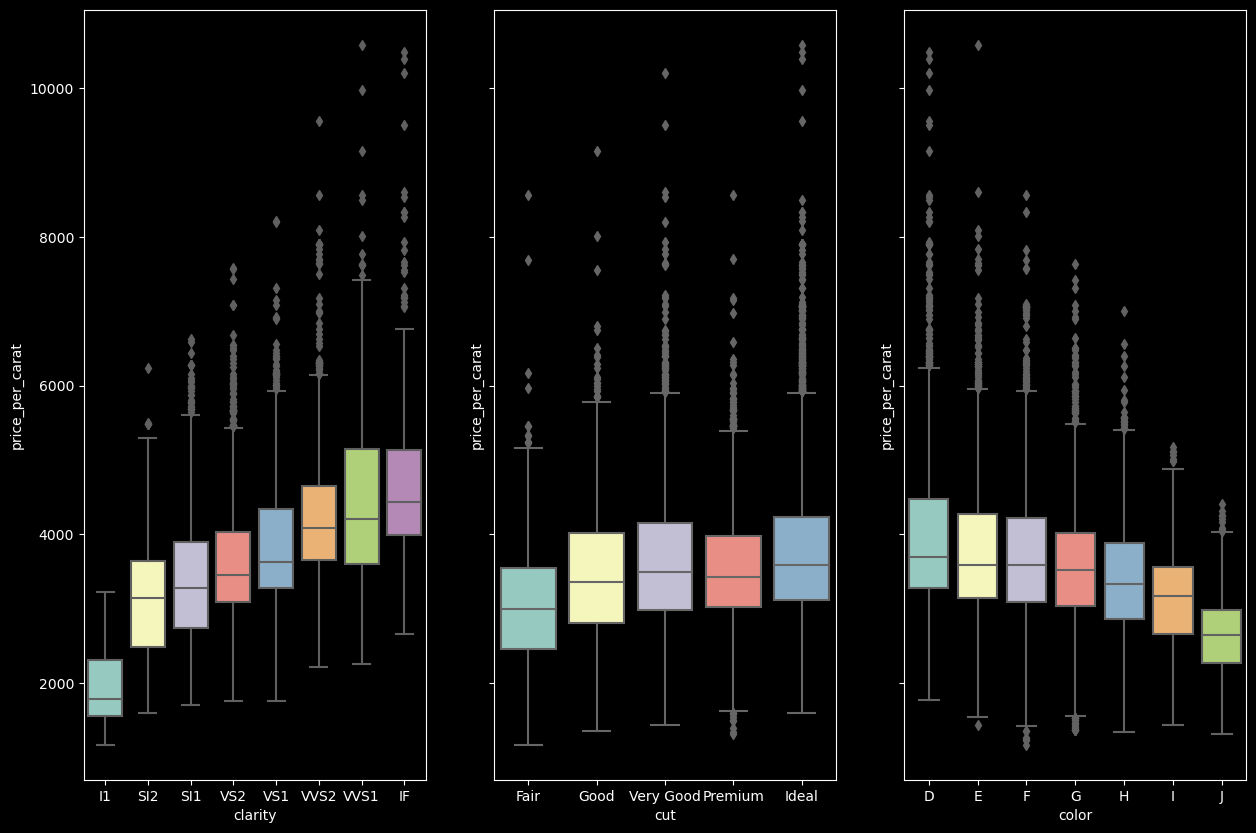

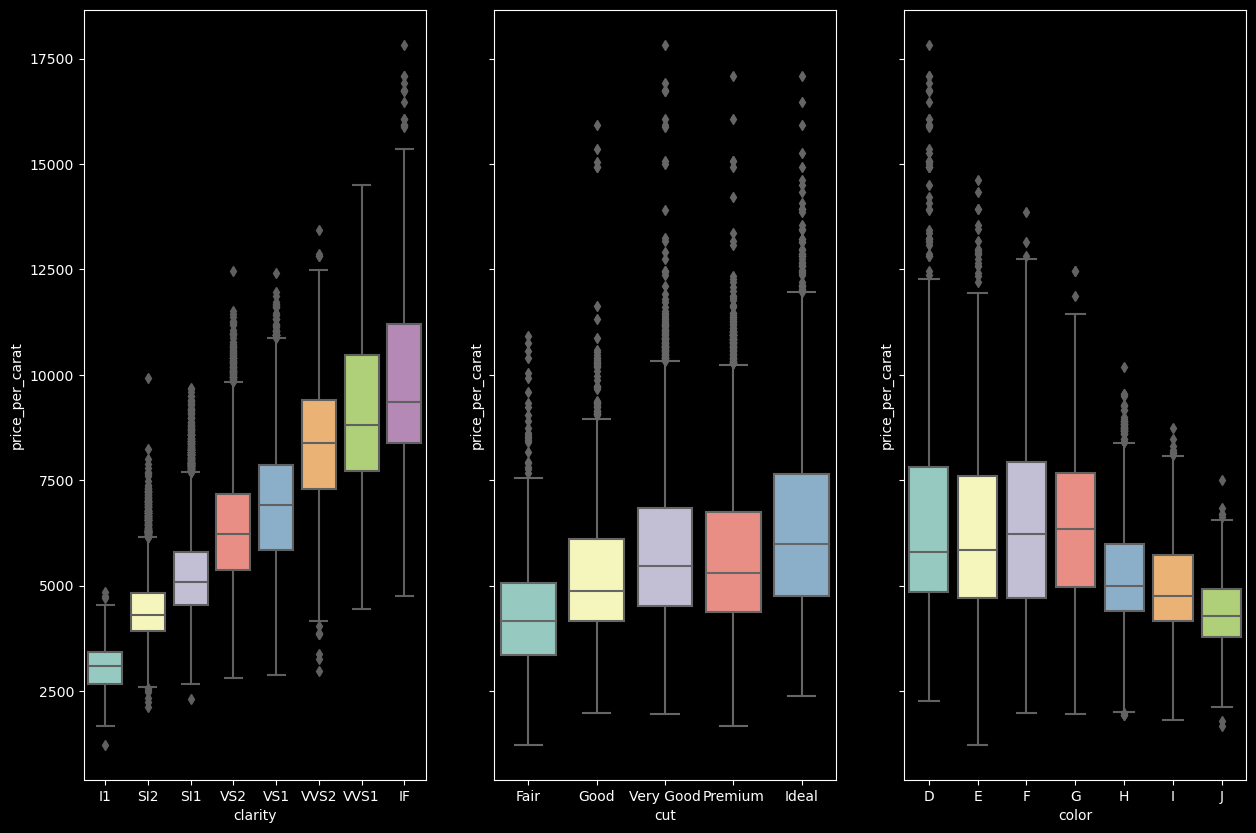

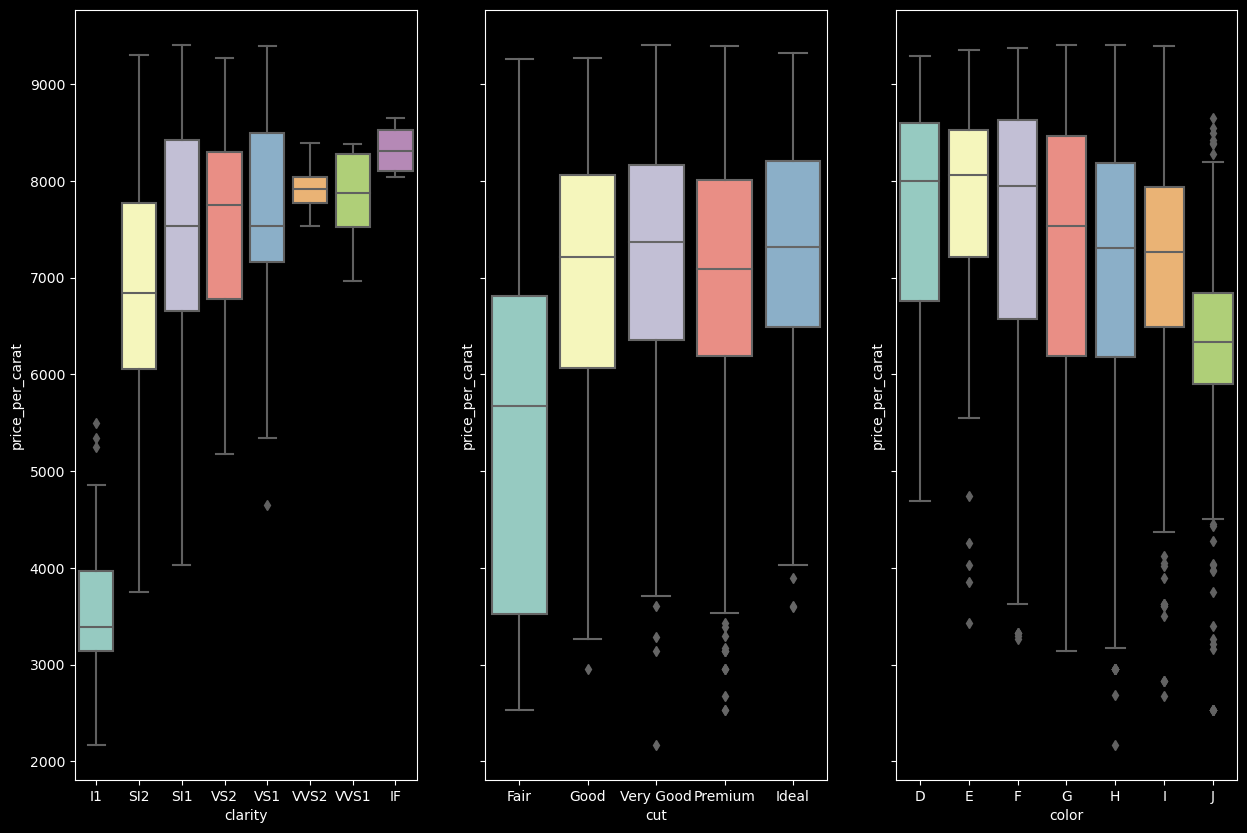

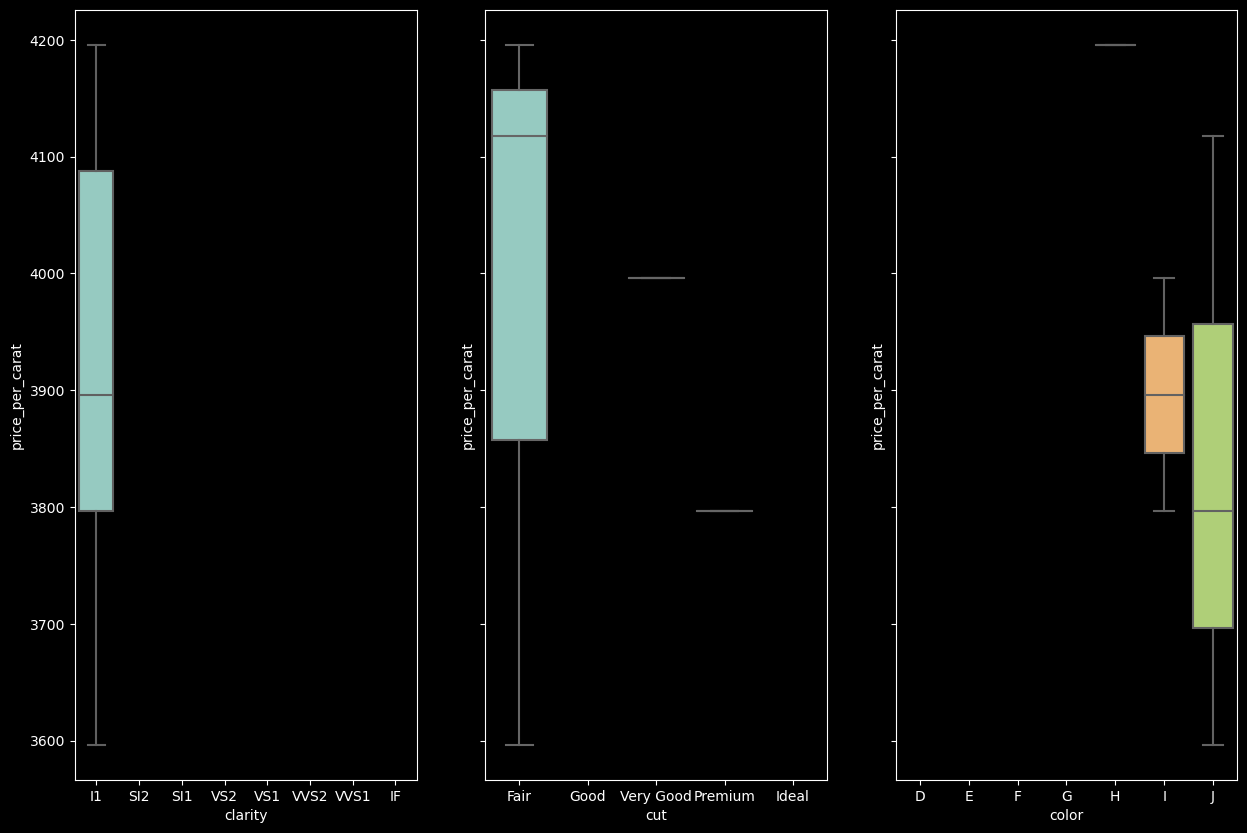

In [298]:
for carat_label in  carat_label_list:
    fig,axs=plt.subplots(1,3,sharey=True,figsize=(15,10))
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="clarity", ax=axs[0])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="cut",ax=axs[1])
    sns.boxplot(data=dimonds[(dimonds["carat_label"])==carat_label],y="price_per_carat",x="color",ax=axs[2])
    
   
    
    ax.set_title(carat_label.upper())


    plt.show()

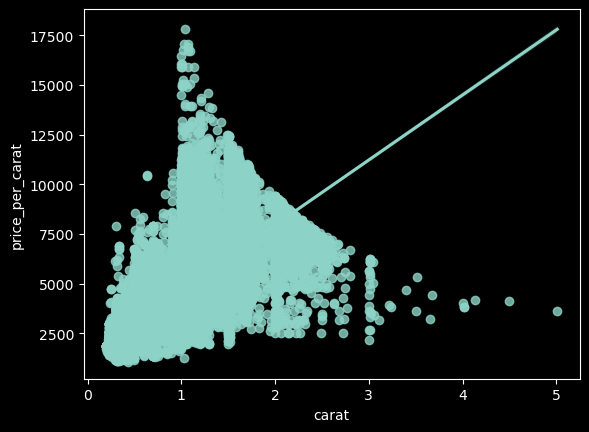

In [299]:
sns.regplot(data=dimonds,x="carat",y="price_per_carat")
plt.show()

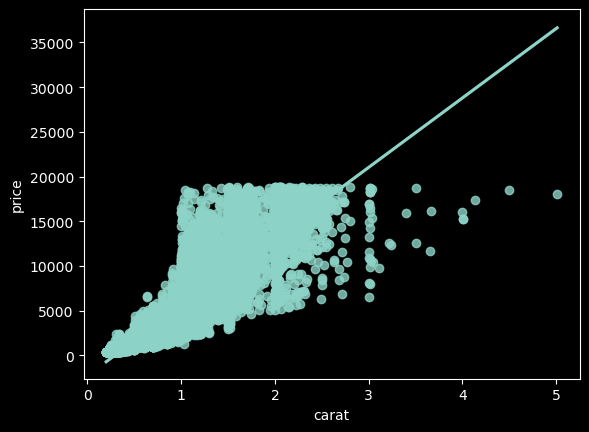

In [300]:
sns.regplot(data=dimonds,x="carat",y="price")
plt.show()